In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import kagglehub
import plotly.express as px
import warnings
%matplotlib inline

In [10]:
# Load the dataset
data = pd.read_csv('./data/Travel.csv')
data.head()
# data.shape

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning
1. Handle Missing Values
2. Hadle Duplicates
3. Check data types
4. Understand the dataset

In [11]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [21]:
# data['Gender'] = data['Gender'].str.strip()
data['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [23]:
data['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [19]:
data['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [22]:
data['Gender'] = data['Gender'].str.replace('Fe Male', 'Female')
data['MaritalStatus'] = data['MaritalStatus'].replace('Single', 'Unmarried')

In [32]:
# Check Missing Values Percentage
features_with_na = [features for features in data.columns if data[features].isnull().sum() >= 1]
features_with_na
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean() * 100, 2), "% Missing Values")

Age 4.62 % Missing Values
TypeofContact 0.51 % Missing Values
DurationOfPitch 5.14 % Missing Values
NumberOfFollowups 0.92 % Missing Values
PreferredPropertyStar 0.53 % Missing Values
NumberOfTrips 2.86 % Missing Values
NumberOfChildrenVisiting 1.35 % Missing Values
MonthlyIncome 4.77 % Missing Values


In [39]:
data[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


<Axes: >

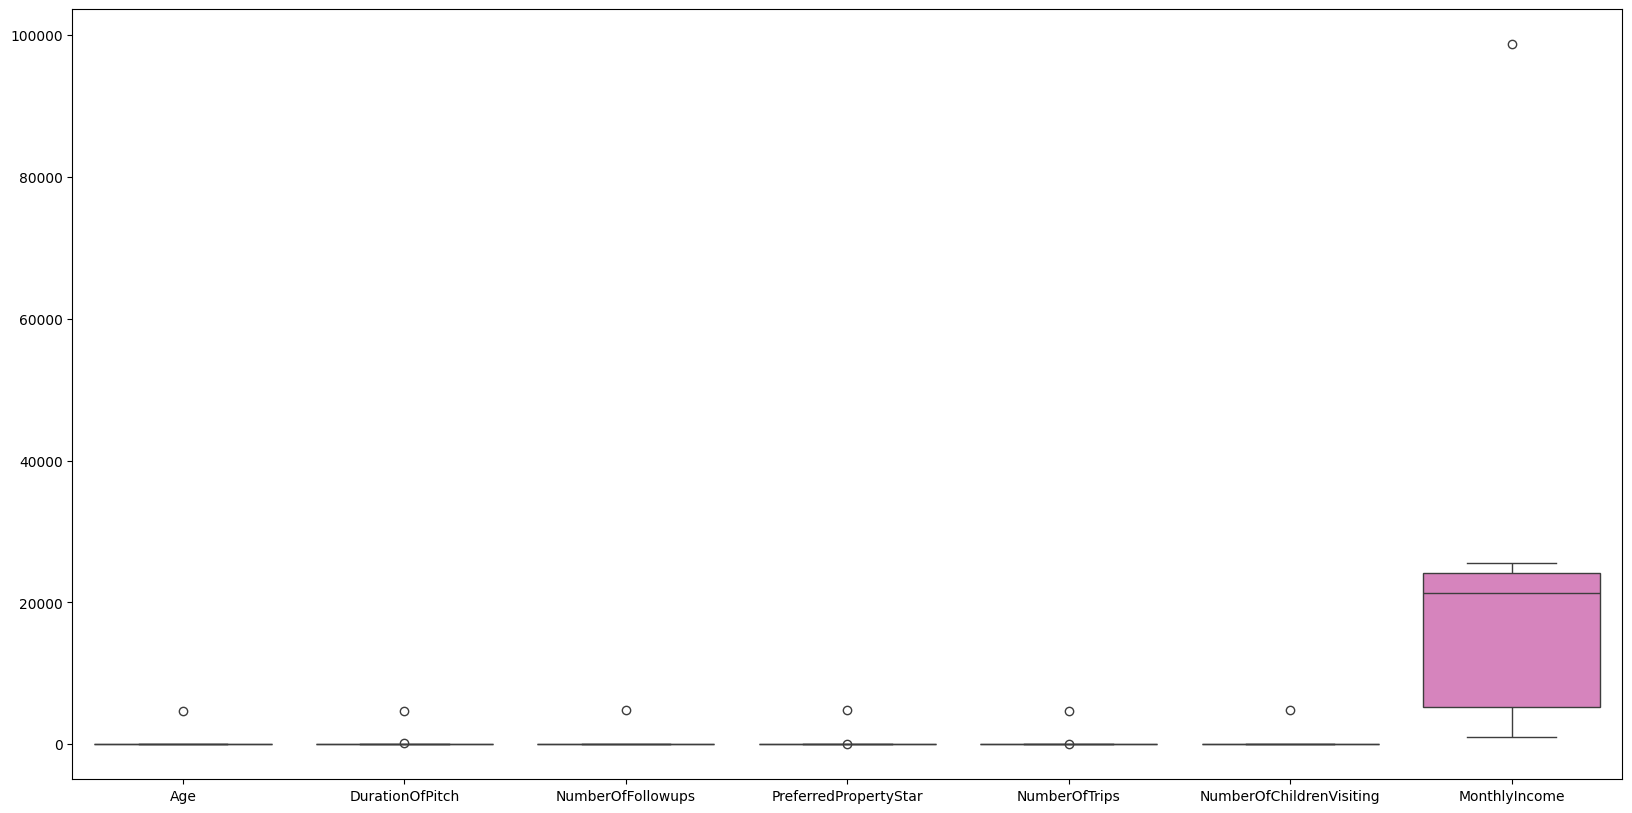

In [37]:
plt.figure(figsize=(20, 10))
sns.boxplot(data[features_with_na].describe())

# Imputing Null values (Super Important)
1. Impute Medin value for all numerical null value column cause median value handle outliers
2. For all categorical features we use Mode

In [52]:
data['Age'].fillna(data.Age.median(), inplace=True)
# data['TypeofContact'].mode()[0] -> 'Self Enquiry'
data['TypeofContact'].fillna(data.TypeofContact.mode()[0], inplace=True)
data['DurationOfPitch'].fillna(data.DurationOfPitch.median(), inplace=True)
data['NumberOfFollowups'].fillna(data.NumberOfFollowups.mode()[0], inplace=True)
data['PreferredPropertyStar'].fillna(data.PreferredPropertyStar.mode()[0], inplace=True)
data['NumberOfTrips'].fillna(0, inplace=True)
# data['Designation'].fillna(data.Designation.mode()[0], inplace=True)
# NumberOfChildrenVisiting
data['NumberOfChildrenVisiting'].fillna(data.NumberOfChildrenVisiting.mode()[0], inplace=True)
data['MonthlyIncome'].fillna(data.MonthlyIncome.median(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15604\1418738992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data.Age.median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15604\1418738992.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [63]:
# data.drop('CustomerID', axis=1, inplace=True)
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Total_Visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


# Features Engineering
- Feature Extraction

In [64]:
# Add two same columns to one columns

data['Total_Visiting'] = data['NumberOfChildrenVisiting'] + data['NumberOfPersonVisiting']
data.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], axis=1, inplace=True)
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [68]:
# get all the numerics features
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'object']
numeric_features
len(numeric_features)

12

In [70]:
# get all the categorical features
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'object']
categorical_features
len(categorical_features)

6

In [75]:
# get all the discrete features
discrete_features = [feature for feature in numeric_features if len(data[feature].unique()) <= 25]
discrete_features
len(discrete_features)

['ProdTaken',
 'CityTier',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'Total_Visiting']

In [76]:
# get all the discrete features
continuous_features = [feature for feature in numeric_features if feature not in discrete_features]
continuous_features
len(continuous_features)

['Age', 'DurationOfPitch', 'MonthlyIncome']

In [77]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
